In [17]:
"""
-------------------------------------------
WAIT YOU ARE ABOUT TO OVERWRITE YOUR MODEL!
-------------------------------------------
"""

SEED = 1

import os
os.environ['PYTHONHASHSEED'] = str(SEED)

import random
random.seed(SEED)

import numpy as np
rng = np.random.default_rng(SEED) 
ss = rng.bit_generator._seed_seq # use for multiprocessing
# child_states = ss.spawn(5)

SEED_states_log = []
# nrg.get_state()

# ----------------------------------------------------------------------------------------------------------


import sys
print(sys.version)
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from datetime import datetime
from datetime import timedelta
from functools import reduce
import multiprocessing
import concurrent.futures
import pickle
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
 

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)



def min_max_scaling(df):
    # copy the dataframe
    tdf = df.copy()
    # apply min-max scaling
    for column in tdf.columns:
        tdf[column] = (tdf[column] - tdf[column].min()) / (tdf[column].max() - tdf[column].min())
#     tdf = tdf.dropna(axis='columns')
    tdf = tdf.fillna(0)
    return tdf

ticker= (
'BTCUSD'
  
)



res = 'Day'
# res = 'Week'
# res = 'Month'
# res = 'Quarter'
# res = 'Year'

exportPath = './export/'
marketPath = './market/'
imgPath = './image/'
tmpPath = './tmp/'

if not os.path.exists(exportPath):
    os.makedirs(exportPath)
if not os.path.exists(marketPath):
    os.makedirs(marketPath)
if not os.path.exists(imgPath):
    os.makedirs(imgPath)
if not os.path.exists(tmpPath):
    os.makedirs(tmpPath)

# --------------------------------------------------------------------------------------------------------------------------------------------
_df = pd.read_csv(marketPath + ticker + '.csv',parse_dates = True,index_col=0)

if res == 'Day':
    _df = _df.resample('D').mean() 
elif res == 'Week':
    _df = _df.resample('W-MON').mean()    
elif res == 'Month':
    _df = _df.resample('MS').first()
elif res == 'Quarter':
    _df = _df.resample('Q').mean()    
elif res == 'Year':
    _df = _df.resample('Y').mean() 
    
df = _df.interpolate(method='linear', axis=0).ffill().bfill()    

earliest = df.iloc[:1].index
earliest = earliest.strftime('%Y-%m-%d')[0]

latest = df.iloc[-1:].index
latest = latest.strftime('%Y-%m-%d')[0]

print(earliest, latest)



3.10.11 (main, Apr  9 2023, 03:52:41) [GCC 12.2.1 20230201]
2009-10-05 2024-03-08


In [28]:
#######################################################################################################

# start_date = "2020-01-01"
# end_date = "2021-09-17"


# if res == 'Day':
#     start_date = "2000-01-01"
#     end_date = latest
# else:
    # start_date = earliest
    # end_date = latest    

start_date = "2024-02-08"
end_date = latest    

# start_date = "2012-12-19"
# end_date = "2021-12-31"

# start_date = earliest
# end_date = latest    

after_start_date = df.index >= start_date
before_end_date = df.index <= end_date
between_two_dates = after_start_date & before_end_date
df = df.loc[between_two_dates]

#######################################################################################################

df = min_max_scaling(df)

#######################################################################################################

result=seasonal_decompose(df['close'])



df["close"] = df["close"] 
df["seasonal"] = result.seasonal 
df["trend"] = result.trend
df["resid"] = result.resid


df = df.assign(flag=df['seasonal'].gt(df['seasonal'].shift(1)))
out = exportPath + ticker + "_seasonal_decompose_signal.csv"
df.to_csv(out,index=True)


df = df.drop({'flag'}, axis=1).fillna(0)
# print(df)

df = df.tail(30)


In [29]:
# import matplotlib.pyplot as plt
# plt.matplotlib.style.available

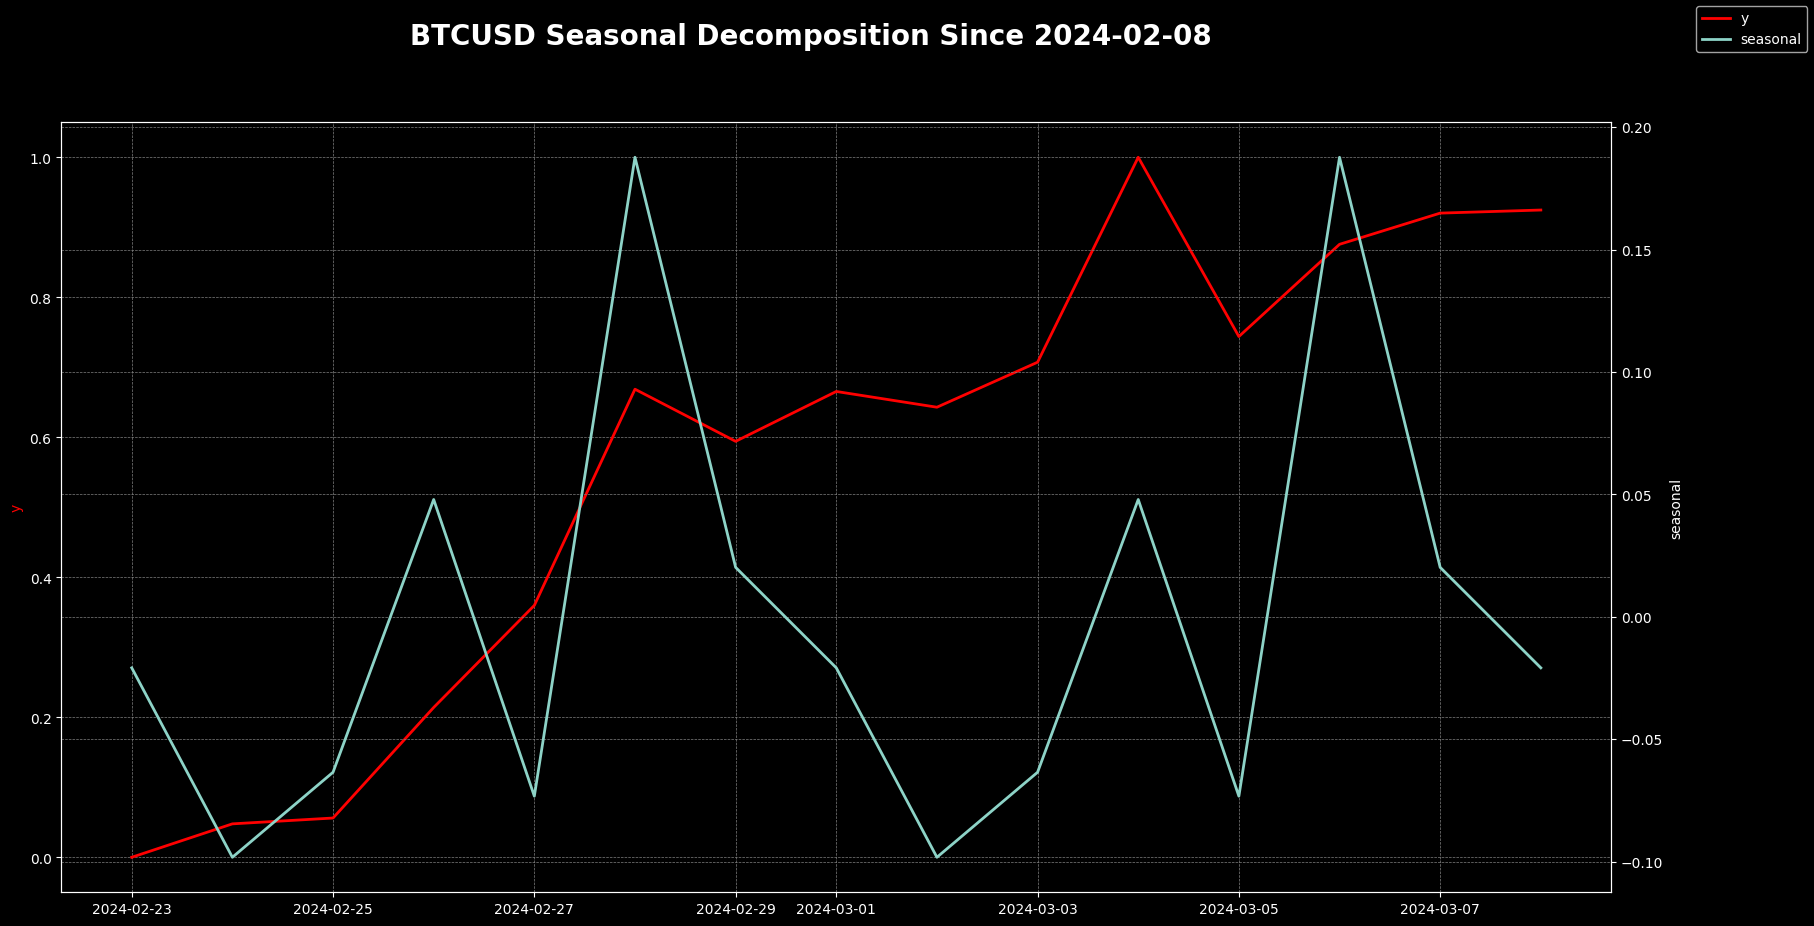

In [30]:
import matplotlib.pyplot as plt

# Set a dark style for the plot
plt.style.use('dark_background')


# Create a figure with two subplots that share the same x-axis
fig, ax1 = plt.subplots(figsize=(20,10), sharex=True)
ax2 = ax1.twinx()

# Plot time series 1 on ax1
ax1.plot(df.close, linewidth=2, color="red", label="y")
ax1.set_ylabel('y', color='red')

# Plot time series 2 on ax2
# ax2.plot(df[['trend','seasonal','resid']], linewidth=2, label=['trend','seasonal','resid'])
ax2.plot(df[['seasonal']], linewidth=2, label='seasonal')
ax2.set_ylabel('seasonal')

# Set a title for the entire figure
title = ticker + " Seasonal Decomposition Since " + start_date
fig.suptitle(title, fontsize=20, fontweight="bold")

# Set a grid on both axes
grid_style = {'linewidth': 0.5, 'color': 'gray', 'linestyle': '--'}
ax1.grid(True, **grid_style)
ax2.grid(True, **grid_style)

# Add a legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

lines += lines2
labels += labels2

fig.legend(lines, labels, loc='upper right')

plt.savefig(imgPath + title, dpi=300, bbox_inches='tight')

plt.show()

